In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for dealing with null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

# Importing The Dataset

In [3]:
df=pd.read_csv('waterpotability.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3267 non-null   float64
 2   Solids           3267 non-null   float64
 3   Chloramines      3267 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3267 non-null   float64
 6   Organic_carbon   3267 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3267 non-null   float64
 9   Potability       3267 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 255.4 KB


In [92]:
df.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
67,NaN,103.464759,27420.167425,8.417305,NaN,485.974500,11.351133,67.869964,4.620793,0
2763,7.296909,149.079496,15931.429226,6.550096,276.013273,367.904802,14.723055,62.634449,4.671448,1
1755,NaN,208.367046,22444.090068,5.404248,338.063690,540.899540,9.980418,84.570083,3.594444,0
3130,8.357613,163.098254,34989.047081,7.696943,317.301680,404.492614,8.271882,67.598158,4.366242,1
2592,7.766187,223.057835,14945.295661,6.026817,NaN,482.406236,6.747761,83.186751,3.674225,0


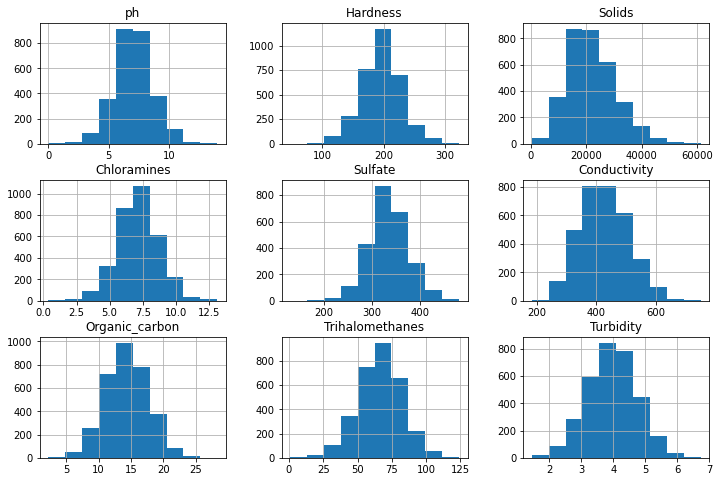

In [4]:
df.drop('Potability', axis=1).hist(figsize=(12,8))
plt.show()

## Visualisations of measures

### pH of water

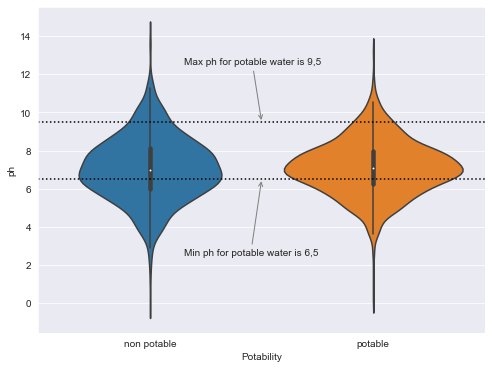

In [95]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='ph', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.axhline(y=9.5, linestyle='dotted', color='black')
ax.axhline(y=6.5, linestyle='dotted', color='black')
ax.annotate('Max ph for potable water is 9,5', xy=[0.5,9.5], 
           xytext=[0.15,12.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
ax.annotate('Min ph for potable water is 6,5', xy=[0.5,6.5], 
           xytext=[0.15,2.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Hardness - Capacity of water to precipitate soap in mg/L

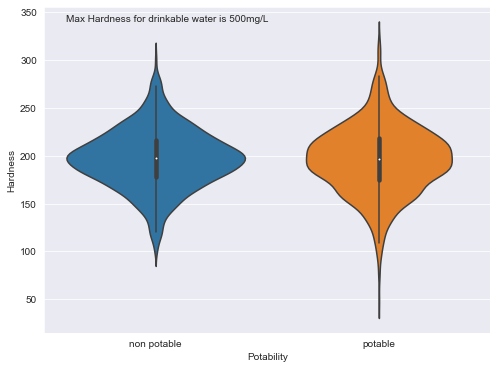

In [96]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Hardness', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.annotate('Max Hardness for drinkable water is 500mg/L', xy=[0.5,350], 
           xytext=[-0.4,340])
plt.show()

### Solids - Total dissolved solids in ppm

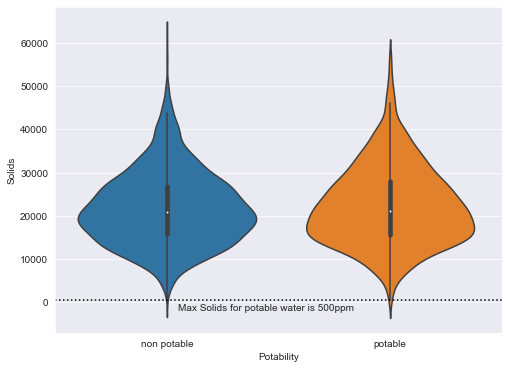

In [97]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Solids', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=500, linestyle='dotted', color='black')
ax.annotate('Max Solids for potable water is 500ppm', xy=[0.5,0], 
           xytext=[0.05,-1800])
plt.show()

### Chloramines - Amount of Chloramines in ppm

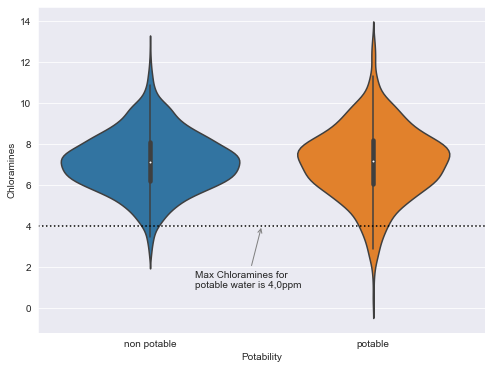

In [98]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Chloramines', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.axhline(y=4, linestyle='dotted', color='black')
ax.annotate('Max Chloramines for \npotable water is 4,0ppm', xy=[0.5,4], 
           xytext=[0.20,1],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Sulfate - Amount of Sulfates dissolved in mg/L

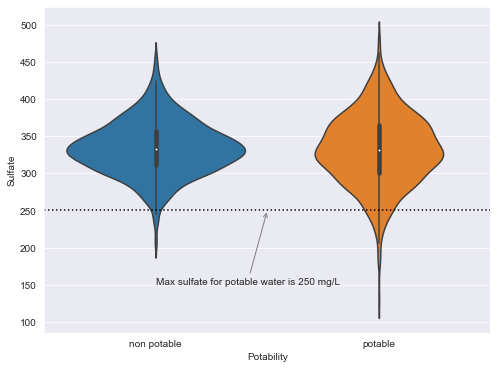

In [99]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Sulfate', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=250, linestyle='dotted', color='black')
ax.annotate('Max sulfate for potable water is 250 mg/L', xy=[0.5,250], 
           xytext=[0,150],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Conductivity - Electrical conductivity of water in μS/cm

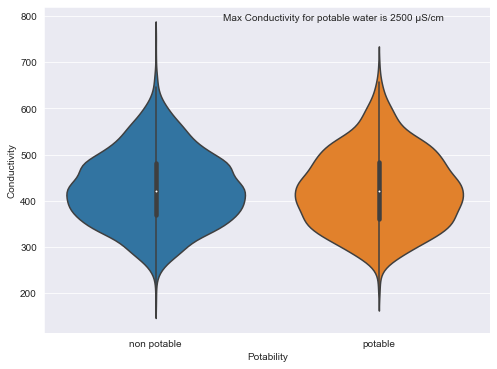

In [100]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Conductivity', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.annotate('Max Conductivity for potable water is 2500 μS/cm', xy=[0.4,750], xytext=[0.3,790])
plt.show()

### Organic_carbon - Amount of organic carbon in ppm

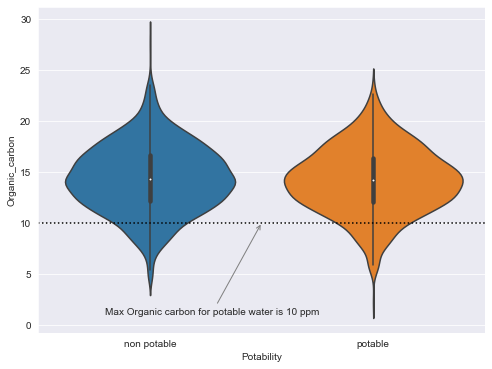

In [101]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Organic_carbon', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=10, linestyle='dotted', color='black')
ax.annotate('Max Organic carbon for potable water is 10 ppm', xy=[0.5,10], 
           xytext=[-0.2,1],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Trihalomethanes - Amount of Trihalomethanes in μg/L

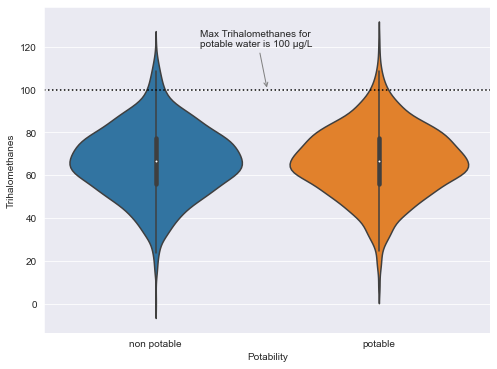

In [102]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Trihalomethanes', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=100, linestyle='dotted', color='black')
ax.annotate('Max Trihalomethanes for \npotable water is 100 μg/L', xy=[0.5,100], 
           xytext=[0.2,120],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Turbidity - Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)

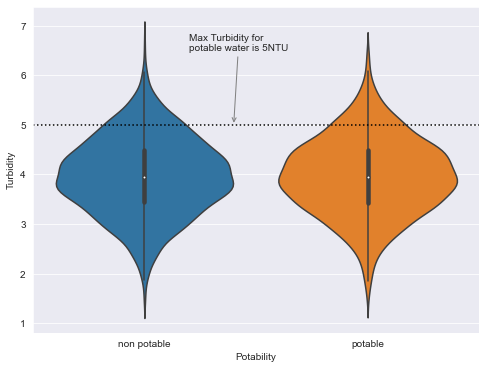

In [103]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Turbidity', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=5, linestyle='dotted', color='black')
ax.annotate('Max Turbidity for \npotable water is 5NTU', xy=[0.4,5], xytext=[0.2,6.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

#### After checking all measures we can see that most of the measures do not meet the standards

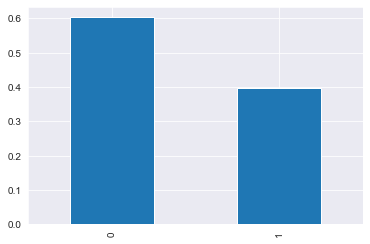

In [107]:
df['Potability'].value_counts(normalize=True).plot(kind='bar')
plt.show()

# Data Preparation - dealing with missing values

In [30]:
df.isnull().sum()

ph                 482
Hardness             0
Solids               0
Chloramines          0
Sulfate            772
Conductivity         0
Organic_carbon       0
Trihalomethanes    153
Turbidity            0
Potability           0
dtype: int64

In [31]:
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

round(df_imputed, 2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.19,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0.0
1,3.72,129.42,18630.06,6.64,344.84,592.89,15.18,56.33,4.50,0.0
2,8.10,224.24,19909.54,9.28,331.98,418.61,16.87,66.42,3.06,0.0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0.0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0.0
...,...,...,...,...,...,...,...,...,...,...
3262,4.67,193.68,47580.99,7.17,359.95,526.42,13.89,66.69,4.44,1.0
3263,7.81,193.55,17329.80,8.06,338.61,392.45,19.90,66.47,2.80,1.0
3264,9.42,175.76,33155.58,7.35,326.85,432.04,11.04,69.85,3.30,1.0
3265,5.13,230.60,11983.87,6.30,336.99,402.88,11.17,77.49,4.71,1.0


In [32]:
df_imputed.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

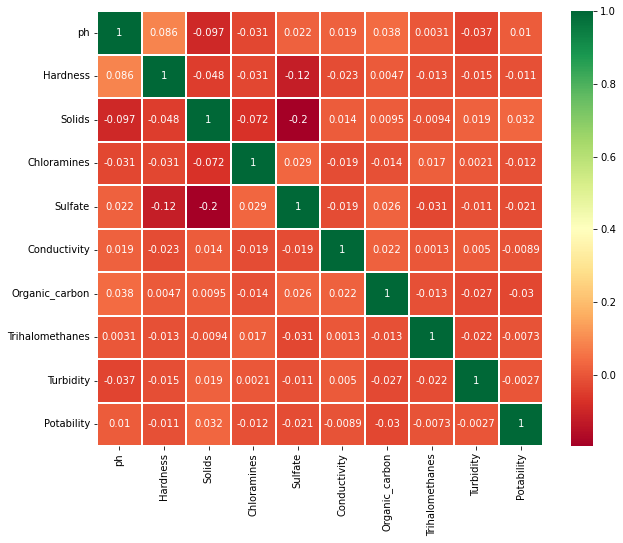

In [33]:
corr=df_imputed.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.05)
plt.show()

# Standardizing The Data

In [35]:
X = df_imputed.drop('Potability',axis=1)
y = df_imputed['Potability']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling - spot checking

In [94]:
seed = 42
models =[("LR", LogisticRegression(random_state=seed)),("KNN",KNeighborsClassifier()), 
         ("XGB", XGBClassifier(random_state=seed)), ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()), 
         ("Ridge", RidgeClassifier(random_state=seed)), ('RF',RandomForestClassifier(random_state=seed)),
         ('ADA',AdaBoostClassifier(random_state=seed)), ("GB",GradientBoostingClassifier(random_state=seed))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults  # Precision score

In [95]:
finalResults

[('GB', 0.6374235661214267),
 ('RF', 0.6367298886614527),
 ('LR', 0.6125),
 ('Ridge', 0.6125),
 ('KNN', 0.6043283718381882),
 ('GNB', 0.5996365446511374),
 ('XGB', 0.5849675425639431),
 ('DTC', 0.5619241145694165),
 ('ADA', 0.5586032741205156)]

#### I chose the top 3 baseline models and performed Hyperparameter tuning to it.

# Hyperparameter Tuning

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

### Random Forrest hyperparameters tuning

In [97]:
rf = RandomForestClassifier()
param_gridRF = {'n_estimators':[100,200,300], 'max_depth':list(range(6,12)), 'random_state': [42]}

In [98]:
grid_rf = GridSearchCV(rf, param_gridRF, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [99]:
print('Best parameters: {}'.format(grid_rf.best_params_))
print('Best score: {}'.format(grid_rf.best_score_))

Best parameters: {'max_depth': 11, 'n_estimators': 200, 'random_state': 42}
Best score: 0.6644870910901708


In [100]:
rf9 = RandomForestClassifier(max_depth=9, random_state=42)  # default: 'max_features': 'sqrt', 'n_estimators': 100
rf9.fit(X_train, y_train)
rf9_results = rf9.predict(X_test)
score_rf9 = precision_score(y_test, rf9_results)
score_rf9

0.6470588235294118

In [101]:
y_pred1 = rf9.predict(X_test)
confusion_matrix(y_pred1, y_test)

array([[564, 281],
       [ 48,  88]], dtype=int64)

In [102]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77       845
           1       0.24      0.65      0.35       136

    accuracy                           0.66       981
   macro avg       0.58      0.66      0.56       981
weighted avg       0.83      0.66      0.72       981



In [103]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred1)
auc=roc_auc_score(y_test, y_pred1)
print('AUC: %.3f' % auc)

AUC: 0.580


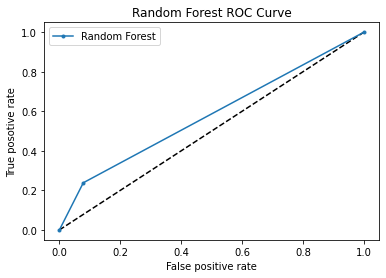

In [104]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

### GB hyperparameters tuning

In [105]:
param_gridGB ={ 'learning_rate':[0.001,0.01,0.1,1],
            'n_estimators':[100,200,500,1000], 'random_state': [42]}
print("GB Parameters:\n{}".format(param_gridGB))

GB Parameters:
{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100, 200, 500, 1000], 'random_state': [42]}


In [50]:
gb=GradientBoostingClassifier()
clf_GB = GridSearchCV(gb, param_gridGB, cv=5)
clf_GB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 500, 1000],
                         'random_state': [42]})

In [52]:
print('Best parameters: {}'.format(clf_GB.best_params_))
print('Best score: {}'.format(clf_GB.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 42}
Best score: 0.6478619819785386


In [33]:
gbT = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=42)
gbT.fit(X_train, y_train)
gbT_results = gbT.predict(X_test)
score_gbT = precision_score(y_test, gbT_results)
score_gbT

0.6124031007751938

In [34]:
y_pred2 = gbT.predict(X_test)
confusion_matrix(y_pred2, y_test)

array([[562, 290],
       [ 50,  79]], dtype=int64)

In [35]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       852
           1       0.21      0.61      0.32       129

    accuracy                           0.65       981
   macro avg       0.57      0.64      0.54       981
weighted avg       0.83      0.65      0.71       981



In [36]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred2)
auc=roc_auc_score(y_test, y_pred2)
print('AUC: %.3f' % auc)

AUC: 0.566


### Logistic Regression hyperparameters tuning

In [58]:
param_gridLR ={ 'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2', 'elasticnet'], 
               'max_iter': [100, 500, 1000], 'random_state':[42]}
print("LR Parameters:\n{}".format(param_gridLR))

LR Parameters:
{'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2', 'elasticnet'], 'max_iter': [100, 500, 1000], 'random_state': [42]}


In [59]:
lr = LogisticRegression()
clf_LR = GridSearchCV(lr, param_gridLR, cv=10)
clf_LR.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [42]})

In [60]:
print('Best parameters: {}'.format(clf_LR.best_params_))
print('Best score: {}'.format(clf_LR.best_score_))

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42}
Best score: 0.5953669654485559


In [37]:
lrT = LogisticRegression(C=0.01)  # default 'max_iter': 100, 'penalty': 'l2'
lrT.fit(X_train, y_train)
lrT_results = lrT.predict(X_test)
score_lrT = precision_score(y_test, lrT_results)
score_lrT

0.0

In [38]:
y_pred3 = lrT.predict(X_test)
confusion_matrix(y_pred3, y_test)

array([[611, 369],
       [  1,   0]], dtype=int64)

In [39]:
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       980
           1       0.00      0.00      0.00         1

    accuracy                           0.62       981
   macro avg       0.50      0.31      0.38       981
weighted avg       1.00      0.62      0.77       981



### Conclusions:

### The characteristics of the water on which the model was based did not allow to achieve good results:

###  1. All the characterics of potable water and non potable were almost the same, eg. mean, min, max

###  2. Only 2,7% of the water samples were safe in terms of Chloramines levels.

###  3. Only 2.3% of the water samples were safe in terms of Sulfate levels.

###  4. The correlation coefficients between the features were very low.

###  5. Random Forest and GBClassifier worked the best to train the model.